### Adjust Settings

In [1]:
# IMPORTANT: Target subject
target = 1
# IMPORTANT: Controls ERP/TFR preprocessing, turn off if you want to ignore an analysis and save time
do_erp = True
do_tfr = False
# Turn off to prevent plots from saving
save_flag = True
# Turn on for sanity checks (visualizations after each pipeline step that don't get saved)
debug_images = False
# Controls detail level of MNE logs (in order from most to least: debug/info/warning/error/critical)
debug_logs = 'critical'

### Imports

In [2]:
from src.preprocessing import *
from src.plotting import *
import os
import mne
from mne_bids import BIDSPath
import numpy as np
from scipy import stats
from IPython.display import HTML

### Pipeline
For each subject: load their data, filter it, perform ICA and epoching (based on analysis). Here the pipeline is broken down into blocks for easier testing.

In [3]:
# Set path for BIDS data structure
main_path = BIDSPath(root = 'data', task = 'jacobsen', suffix = 'eeg')
subject_paths = main_path.match()

# Iterate over subjects
for subject in subject_paths:
        
        # In this case, we only get the targeted subject
        if subject == subject_paths[target-1]:
                
                # Load data
                data = load_subject(subject, debug_logs, debug_images)

Reading 0 ... 499199  =      0.000 ...   974.998 secs...


In [4]:
# Filter data
data = filter_data(data, debug_logs, debug_images)

In [5]:
# Perform independent component analysis
data = ica(data, debug_logs, debug_images)

### Analysis: Event-Related Potential (ERP)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
combining channels using "mean"
combining channels using "mean"


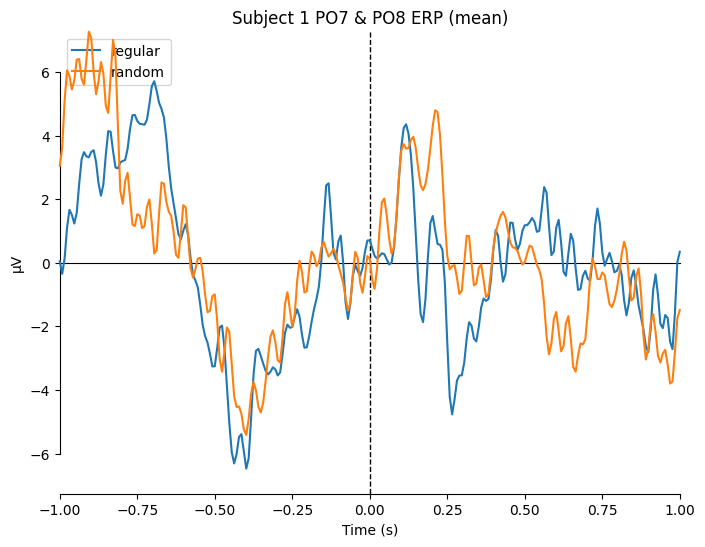

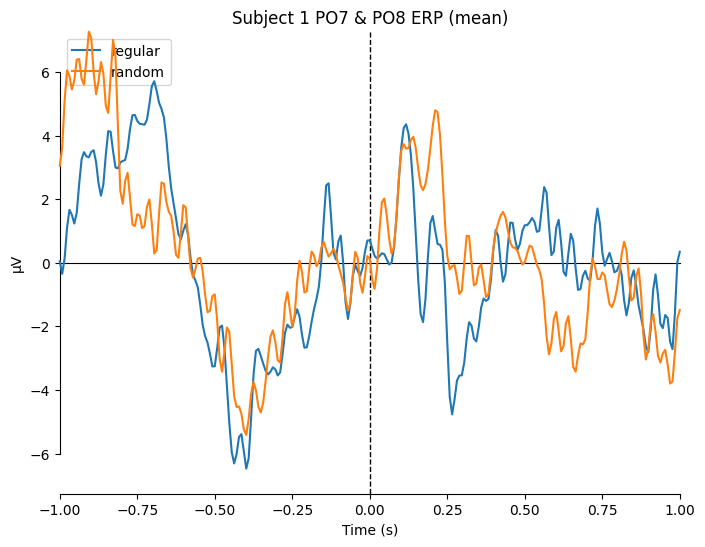

In [8]:
# Get epochs by defining time window in seconds (X axis) and rejection in microvolts
epochs = epoch_data(data, time_min = -1, time_max = 1, reject_criteria = 100e-6, debug_logs = debug_logs, debug_images = debug_images)

# Plot ERP
plot_erp(epochs, subject_id = target)

### Analysis: Time Frequency Representation (TFR)

c:\Users\George\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\baseline.py:116: RuntimeWarning: invalid value encountered in log10
  np.log10(d, out=d)


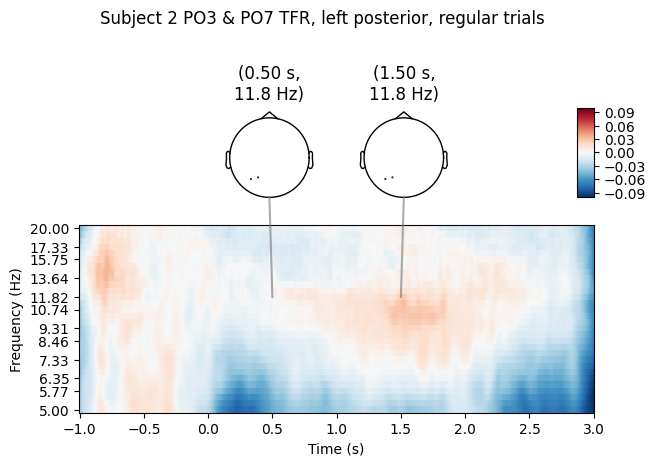

c:\Users\George\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\baseline.py:116: RuntimeWarning: invalid value encountered in log10
  np.log10(d, out=d)


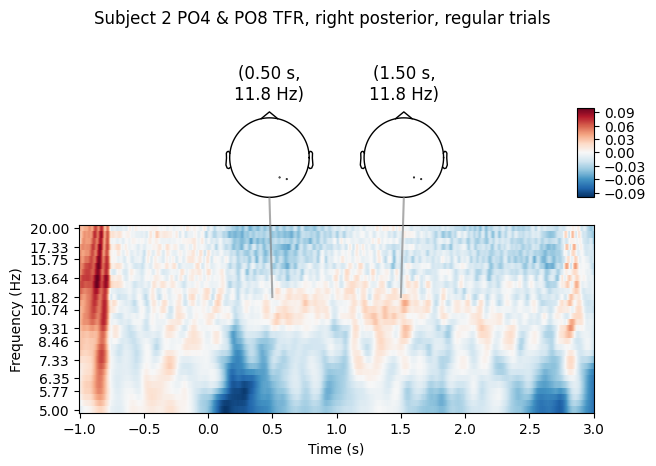

c:\Users\George\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\baseline.py:116: RuntimeWarning: invalid value encountered in log10
  np.log10(d, out=d)


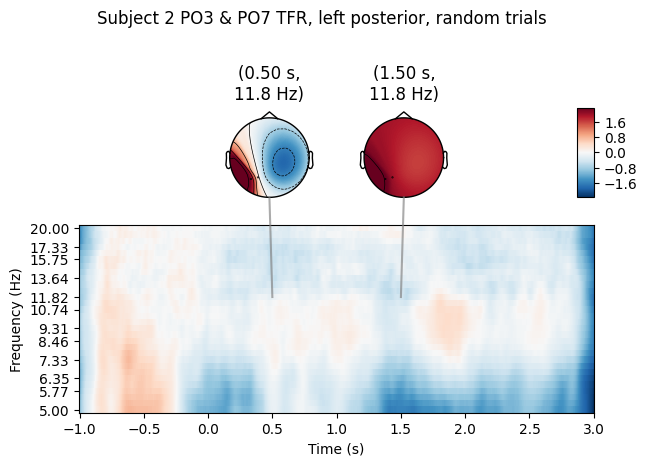

c:\Users\George\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\baseline.py:116: RuntimeWarning: invalid value encountered in log10
  np.log10(d, out=d)


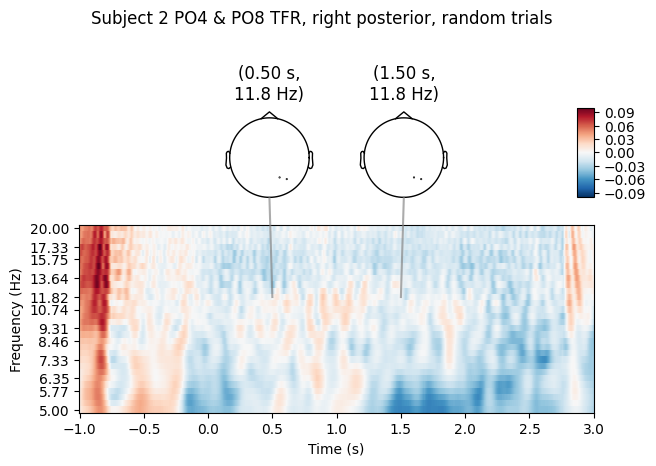

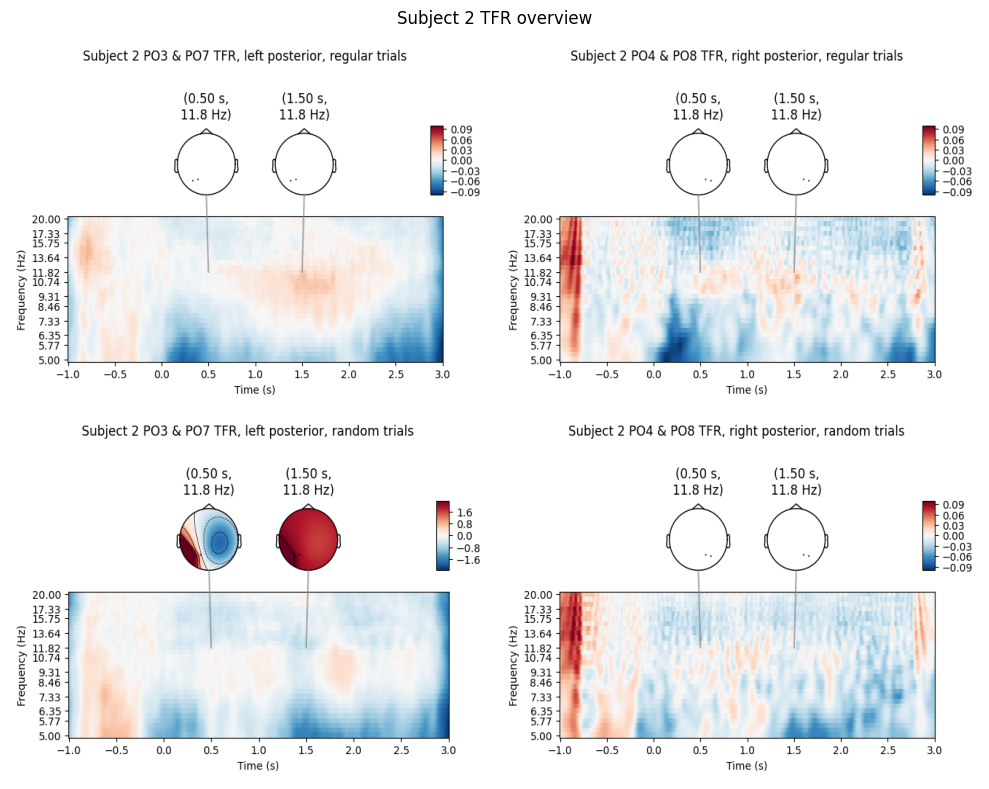

In [11]:
# Get epochs by defining time window in seconds (X axis)
epochs = epoch_data(data, time_min = -1, time_max = 3, reject_criteria = False, debug_logs = debug_logs, debug_images = debug_images)
powers = perform_tfr(epochs, debug_logs)
spectra = {'regular': powers['regular'],
        'random': powers['random']}

# Plot TFR
plot = plot_tfr(spectra, subject_id = target+1, debug_logs = debug_logs)